<a href="https://colab.research.google.com/github/FedeGu/ADatos2024_ProyectoFinal_Data-dinasty-/blob/main/CD_5_presentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

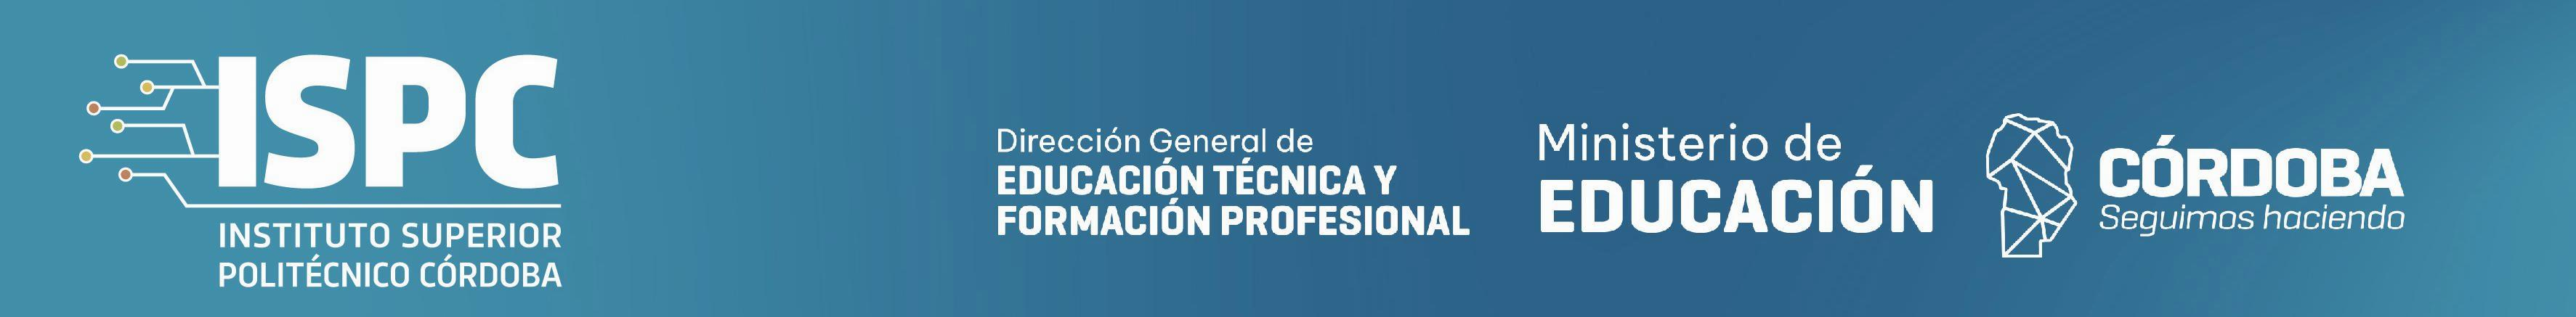


# Grupo: Data Dinasty

| Propuesta de modelo de Regresión Lineal simple, múltiple y Regresión Logística | Ispc | 2024


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # divide datos en conj de entrenamiento y prueba
from sklearn.linear_model import LinearRegression # para crear el modelo de regresion lineal.
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
test = pd.read_csv("Tests.csv", sep=';')
completos = pd.read_csv("Completos.csv", sep=';')

In [ ]:
df_unido = pd.merge(test, completos, on='TestId', how='right')
df_unido.shape

(4845, 32)

In [ ]:
df_limpio = df_unido[['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate']]

In [ ]:
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TestId                     4845 non-null   object 
 1   RawDataId                  3148 non-null   object 
 2   Date                       3148 non-null   object 
 3   Time                       3148 non-null   object 
 4   Systolic                   3148 non-null   float64
 5   Diastolic                  3148 non-null   float64
 6   MAP                        3148 non-null   float64
 7   HR                         3148 non-null   float64
 8   PP                         3148 non-null   float64
 9   PatientId                  4845 non-null   object 
 10  Interpretation             4798 non-null   object 
 11  HookupStartTime            4845 non-null   object 
 12  HookupEndTime              4845 non-null   object 
 13  Duration                   4845 non-null   objec

Diastolic    float64
Systolic     float64
Age            int64
PP           float64
GenderId       int64
HR           float64
dtype: object
    Diastolic  Systolic  Age    PP  GenderId    HR
63       79.0     144.0   58  65.0         0  64.0
64       79.0     151.0   58  72.0         0  81.0
65       89.0     139.0   58  50.0         0  67.0
66       76.0     135.0   58  59.0         0  63.0
67       82.0     145.0   58  63.0         0  67.0


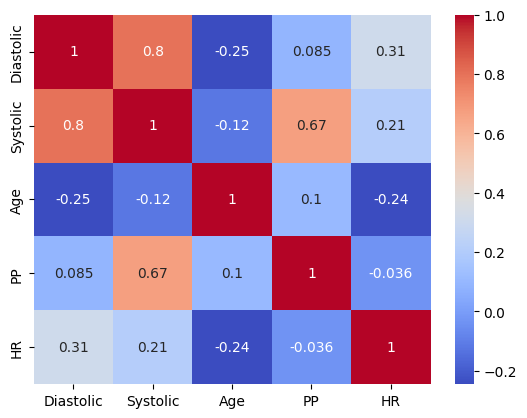

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df_limpio[['Diastolic', 'Systolic', 'Age', 'PP','GenderId','HR',]].dtypes)
print(df_limpio[['Diastolic', 'Systolic', 'Age', 'PP','GenderId','HR']].head())

# Eliminar filas con valores faltantes en 'Diastolic', 'Systolic', 'Age' y 'GenderId'
df_limpio = df_limpio.dropna(subset=['Diastolic', 'Systolic', 'Age', 'PP','GenderId','HR'])

# Asegurarse de que los datos sean numéricos
df_limpio['Diastolic'] = pd.to_numeric(df_limpio['Diastolic'], errors='coerce')
df_limpio['Systolic'] = pd.to_numeric(df_limpio['Systolic'], errors='coerce')
df_limpio['Age'] = pd.to_numeric(df_limpio['Age'], errors='coerce')
df_limpio['PP'] = pd.to_numeric(df_limpio['PP'], errors='coerce')
df_limpio['HR'] = pd.to_numeric(df_limpio['HR'], errors='coerce')


# Convertir 'GenderId' en una variable numérica (asignar 0 a un género y 1 al otro)
df_limpio['GenderId'] = df_limpio['GenderId'].apply(lambda x: 1 if x == 'Femenino' else 0)

# Crear la matriz de correlación con las columnas 'Diastolic', 'Systolic', 'Age', 'GenderId'
corr_matrix = df_limpio[['Diastolic', 'Systolic', 'Age', 'PP', 'HR']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.show()

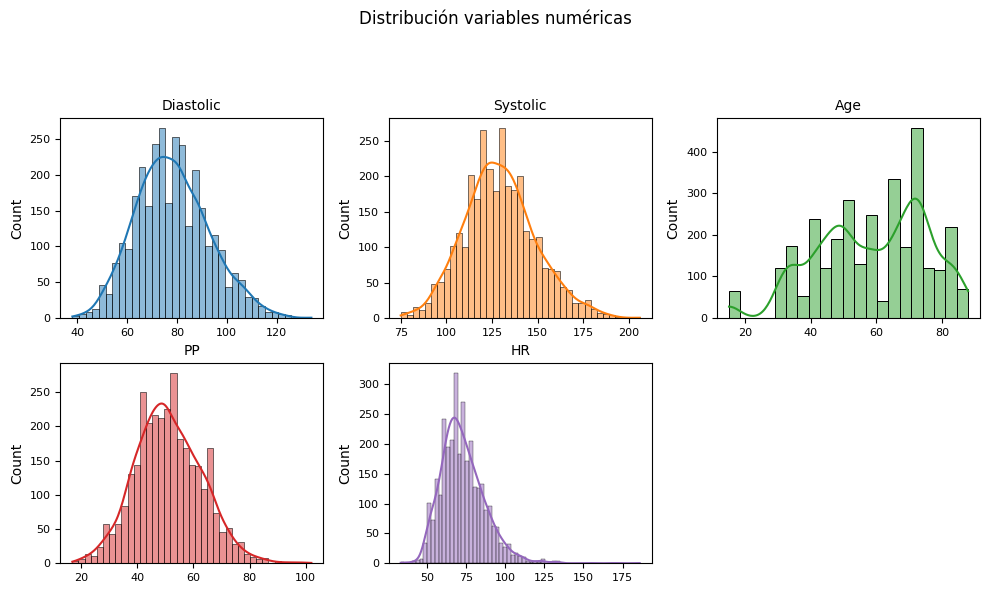

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas específicas
columnas_numeric = ['Diastolic', 'Systolic', 'Age', 'PP', 'HR']

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_limpio,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 12)
plt.show()

Cada subplot es un histograma que representa la frecuencia de los valores de cada variable. Además, cada histograma incluye una curva de densidad (KDE) que te ayuda a visualizar la distribución de los datos de manera más suave.

En resumen, este gráfico te permite ver cómo se distribuyen los valores de cada una de estas variables en tu conjunto de datos, lo que puede ser útil para identificar patrones, tendencias y posibles anomalías

#Regresión Lineal Simple

## 🫀 Relación entre Presión Sistólica y Edad


- Comprender la relación: Se busca determinar si existe una relación estadísticamente significativa entre la presión sistólica y la edad. Es decir, si la presión sistólica tiende a aumentar o disminuir con la edad.

- Predicción: Se quiere crear un modelo que permita predecir el valor de la presión sistólica conociendo la edad de un paciente. Esto podría ser útil para identificar a pacientes con mayor riesgo de hipertensión.

Selección de variables, División de datos de entrenamiento y prueba, Ajustes

In [ ]:
# Filtramos el DataFrame para quedarnos solo con las observaciones donde la edad es mayor o igual a 10
df_filtrado = df_limpio[df_limpio['Age'] >= 10]

# Seleccionamos las variables nuevamente a partir del DataFrame filtrado
X = df_filtrado[['Age']]
y = df_filtrado['Systolic']

# Dividir el dataset en conjuntos de entrenamiento 80%  y prueba 20% divide los datos de forma aleatoria.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar las filas con valores NaN en 'y_train'
y_train = y_train.dropna()

X_train = X_train.loc[y_train.index]

# Comprobar las dimensiones de los conjuntos
print(X_train.shape, X_test.shape)

(2518, 1) (630, 1)


Crear y entrenar el modelo de regresión lineal


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f'Coeficiente: {model.coef_}')
print(f'Intercepción: {model.intercept_}')

Coeficiente: [-0.14562906]
Intercepción: 137.83352605838647


Realizar predicciones


In [ ]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)
print(y_pred[:5])

[128.07637931 127.63949214 127.34823403 127.20260498 128.07637931]


In [ ]:
# Crear un DataFrame para comparar
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

      Predicciones  Valores Reales
4648    128.076379           126.0
1565    127.639492            75.0
2505    127.348234           123.0
2065    127.202605           120.0
4679    128.076379           140.0


 Calcular RMSE, MAE, R2 - Evaluar el rendimiento del modelo

- RMSE: Es útil para entender la magnitud del error en las mismas unidades que los datos originales. #Importar las funciones de evaluación de RMSE Error cuadratico medio, que calcula el error "" entre los valores reales (Y_test) y los predichos (Y_pred). este valor nos indica que tan bien se ajustan el modelo a los datos.
- MAE: Proporciona una medida clara y directa del error promedio.
- R²: Ayuda a evaluar la calidad del ajuste del modelo a los datos

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')

Error cuadrático medio: 18.582247682458288
Error absoluto medio: 14.6835397196942
R² Coeficiente de determinación: 0.010340894160167147


La presión sistólica tiende a disminuir con la edad.


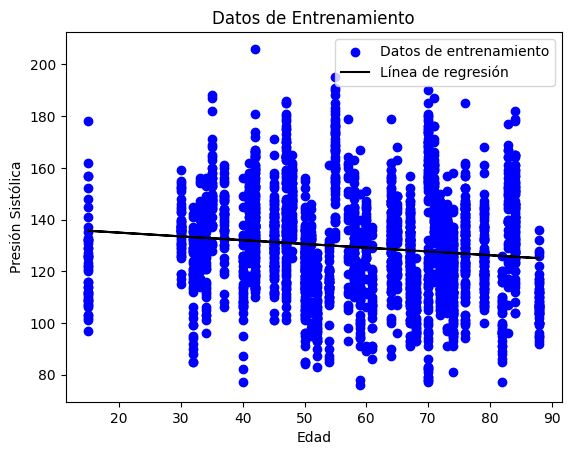

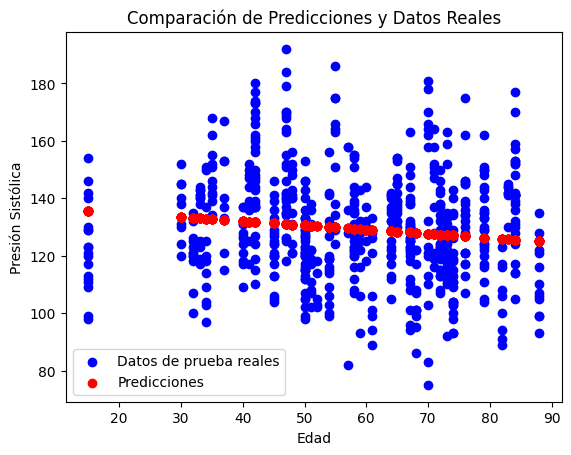

Intersección (b) 137.83352605838647
Pendiente (m) [-0.14562906]


In [ ]:
df_limpio = df_limpio[(df_limpio['Age'] >= 30) & (df_limpio['Age'] <= 100)]

# Elimina filas con valores NaN en 'Systolic' antes de dividir los datos
df_limpio = df_limpio.dropna(subset=['Systolic'])

# Obtener la pendiente
pendiente = model.coef_[0]

# Interpretar la pendiente
if pendiente > 0:
    print("La presión sistólica tiende a aumentar con la edad.")
elif pendiente < 0:
    print("La presión sistólica tiende a disminuir con la edad.")
else:
    print("No se encontró una relación significativa entre la edad y la presión sistólica.")
# Visualización de los datos de entrenamiento y la línea de regresión
plt.scatter(X_train['Age'], y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train['Age'], model.predict(X_train), color='black', label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.legend()
plt.title('Datos de Entrenamiento')
plt.show()

# Visualización de los datos de prueba y las predicciones
plt.scatter(X_test['Age'], y_test, color='blue', label='Datos de prueba reales')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicciones')
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.legend()
plt.title('Comparación de Predicciones y Datos Reales')
plt.show()

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

### Predecicción de edad y presión Sistolica

###**conclusión**
Pendiente negativa = -0.14562906]
Este valor indica la disminución promedio de la presión sistólica por cada año adicional de edad. Es decir, por cada año que aumenta la edad, la presión sistólica tiende a disminuir en aproximadamente 0.145 unidades.


Error Cuadrático Medio (ECM): 18.7462: Este valor indica que, en promedio, las predicciones de tu modelo están desviadas en aproximadamente 19.75 unidades de los valores reales. Es decir, tus predicciones no son muy precisas.
Error Absoluto Medio (MAE): 14.6835: Al igual que el ECM, este valor mide el error promedio de tus predicciones, pero de una manera más directa. Indica que, en promedio, tus predicciones se desvían en aproximadamente 14. unidades de los valores reales.
Coeficiente de Determinación (R²): 0.0110: Este valor es muy bajo y significa que solo el 1.10% de la variabilidad en la presión sistólica puede ser explicada por la edad. En otras palabras, la edad es un muy pobre predictor de la presión sistólica en este caso.

La edad no es un buen predictor de la presión sistólica: La baja R² indica que la edad explica una proporción muy pequeña de la variabilidad en la presión sistólica.
El modelo tiene un alto error: Los valores de ECM y MAE son relativamente altos, lo que sugiere que las predicciones del modelo son imprecisas.


##🫀Relacion entre Presión del pulso y Presión Sistolica

- Comprender la relación: Se busca determinar si existe una relación estadísticamente significativa entre la presión sistólica y la presión del pulso.

- Predicción: Se quiere crear un modelo que permita predecir el valor de la presión sistólica conociendo el valor de la presión del pulso. Esto sería útil, por ejemplo, para estimar la presión sistólica en pacientes donde esta medición no está disponible.

Selección de variables, División de datos de entrenamiento y prueba, Ajustes

In [ ]:
# Seleccionar las variables independientes Sistolica (X) y dependiente (y) Presion de
X = df_limpio[['Systolic']]
y = df_limpio['PP']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un imputador para reemplazar los valores NaN con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar X_train y X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Eliminar las filas con valores NaN en 'y_train' and 'y_test'
y_train = y_train.dropna()
y_test = y_test.dropna()

y_train = y_train.reset_index(drop=True)  # drop=True avoids creating an 'index' column
y_test = y_test.reset_index(drop=True)

X_train = X_train[y_train.index]
X_test = X_test[y_test.index]

Crear y entrenar el Modelo de Regresion Lineal **Simple**

In [ ]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Mostrar las primeras predicciones
print(y_pred[:5])

[50.22826255 54.30475921 58.78890553 44.52116724 51.04356189]


In [ ]:
# Crear un DataFrame para comparar predicciones y valores reales
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

   Predicciones  Valores Reales
0     50.228263            51.0
1     54.304759            46.0
2     58.788906            51.0
3     44.521167            33.0
4     51.043562            54.0


Calcular RMSE, MAE, R2

In [ ]:
#RMSE(raiz del error cuadratico medio), MAE:(error absoluto medio), R2(coef, de determinacion)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')

Error cuadrático medio: 8.276408620034784
Error absoluto medio: 6.656876684259777
R² Coeficiente de determinación: 0.49770547923529773


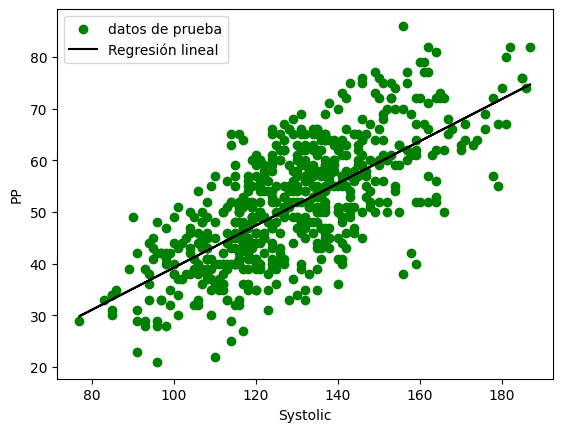

Intersección (b) -1.543244967924764
Pendiente (m) [0.40764967]


In [ ]:
# Visualizar los resultados
plt.scatter(X_test, y_test, color='green', label= 'datos de prueba')
plt.plot(X_test, y_pred, color='black', label='Regresión lineal')
plt.xlabel('Systolic')
plt.ylabel('PP')
plt.legend()
plt.show()


print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)


### Conclusión  
La pendiente positiva de 0.4076 indica que a medida que aumenta presión del pulso en una unidad, la presión sistólica tiende a aumentar en aproximadamente 0.4076 unidades. Esto sugiere una relación positiva entre ambas variables.

**R² ( coeficiente de determinación)  = 0.4977: Indica que aproximadamente el 50% de la variabilidad en la presión sistólica puede ser explicada por la presión del pulso. Es decir, la presión del pulso es un buen predictor, pero no explica toda la variabilidad.**

- Un ECM de 8.2764 indica que, en promedio, nuestras predicciones de la presión sistólica están desviadas en aproximadamente 8.28 unidades de los valores reales.
- Un MAE de 6.6569 indica que, en promedio, nuestras predicciones de la presión sistólica están desviadas en aproximadamente 6.66 unidades de los valores reales.
- Un R² de 0.4977 significa que el 49.77% de la variabilidad en la presión sistólica puede ser explicada por la presión del pulso.


#**Regresión Lineal Múltiple**


## 🫀Predictor de exámenes médicos
Se intenta crear un diagnóstico basándose en la edad, el género y la hora del día.



In [ ]:
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3148 entries, 63 to 4839
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TestId                     3148 non-null   object 
 1   RawDataId                  3148 non-null   object 
 2   Date                       3148 non-null   object 
 3   Time                       3148 non-null   object 
 4   Systolic                   3148 non-null   float64
 5   Diastolic                  3148 non-null   float64
 6   MAP                        3148 non-null   float64
 7   HR                         3148 non-null   float64
 8   PP                         3148 non-null   float64
 9   PatientId                  3148 non-null   object 
 10  Interpretation             3148 non-null   object 
 11  HookupStartTime            3148 non-null   object 
 12  HookupEndTime              3148 non-null   object 
 13  Duration                   3148 non-null   object 
 

In [ ]:
# Convertir las colunas a datatime.
df_limpio['HookupStartTime'] = pd.to_datetime(df_limpio['HookupStartTime'])
df_limpio['HookupEndTime'] = pd.to_datetime(df_limpio['HookupEndTime'])

# Convert 'Systolic' and 'Diastolic' en numéricos .loc
df_limpio.loc[:, 'Systolic'] = pd.to_numeric(df_limpio['Systolic'], errors='coerce')
df_limpio.loc[:, 'Diastolic'] = pd.to_numeric(df_limpio['Diastolic'], errors='coerce')

df_limpio = df_limpio.dropna()

# calcular diferencia de time
time_diff = df_limpio['HookupEndTime'] - df_limpio['HookupStartTime']

df_limpio.loc[:, 'Hour'] = df_limpio['HookupStartTime'] + time_diff / 2

grouped_data = df_limpio.groupby(['Age', 'GenderId', 'Hour']).agg({
    'Diastolic': 'mean',
    'Systolic': 'mean'
}).reset_index()

print(grouped_data.head())


   Age  GenderId                Hour  Diastolic    Systolic
0   15         0 2024-04-17 22:16:30   78.69697  123.651515
1   30         0 2024-04-24 22:07:00  83.883333  136.483333
2   32         0 2024-05-14 22:24:30  68.508475  118.728814
3   33         0 2024-04-25 22:16:00  87.163934  131.672131
4   34         0 2024-08-29 22:23:00  77.407407  126.388889


### Crear variables Independientes(x) y Dependientes(y)

In [ ]:

# Crear las variables independientes (X) y dependientes (y) para la regresión
X = grouped_data[['Age', 'GenderId', 'Hour']]  # Variables predictoras
y_systolic = grouped_data['Systolic']  # Variable dependiente para la presión sistólica
y_diastolic = grouped_data['Diastolic']  # Variable dependiente para la presión diastólica

# Convertir la columna 'gender' en variable numérica (si no lo está)
X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_systolic, y_test_systolic = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
X_train, X_test, y_train_diastolic, y_test_diastolic = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)


<ipython-input-65-f7911cc6981d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)


### Crear y entrenar el modelo

In [ ]:

# Crear las variables independientes (X) y dependientes (y) para la regresión
X = grouped_data[['Age', 'GenderId', 'Hour']]  # Variables predictoras
y_systolic = grouped_data['Systolic']  # Variable dependiente para la presión sistólica
y_diastolic = grouped_data['Diastolic']  # Variable dependiente para la presión diastólica

# Convertir la columna 'gender' en variable numérica (si no lo está)
X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_systolic, y_test_systolic = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
X_train, X_test, y_train_diastolic, y_test_diastolic = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)


model_systolic = LinearRegression()
model_diastolic = LinearRegression()

X_train['Hour'] = X_train['Hour'].dt.hour
X_test['Hour'] = X_test['Hour'].dt.hour

# Entrenar el modelo con los datos de presión sistólica y diastólica
model_systolic.fit(X_train, y_train_systolic)
model_diastolic.fit(X_train, y_train_diastolic)

# Coeficientes del modelo
print(f'Coeficiente: {model.coef_}')
print(f'Intercepción: {model.intercept_}')

Coeficiente: [49.93085934 95.11720067]
Intercepción: 78.09997540792295


<ipython-input-66-5b63303a6427>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)


### Crear predicciones

In [ ]:

# Hacer predicciones sobre el conjunto de prueba para la presión sistólica
y_pred_systolic = model_systolic.predict(X_test)

# Hacer predicciones sobre el conjunto de prueba para la presión diastólica
y_pred_diastolic = model_diastolic.predict(X_test)

# Mostrar las primeras predicciones
print(y_pred[:5])



[141.9299282  155.31098269 126.12357631 134.88942737 140.67091288]


### Evaluar el Modelo

In [ ]:

# Evaluar el modelo de presión sistólica
rmse_systolic = np.sqrt(mean_squared_error(y_test_systolic, y_pred_systolic))
r2_systolic = r2_score(y_test_systolic, y_pred_systolic)
mae = mean_absolute_error(y_test, y_pred)

print("Resultados para la presión sistólica:")
print(f"RMSE: {rmse_systolic}")
print(f"R²: {r2_systolic}")
print(f"mae: {mae}")

Resultados para la presión sistólica:
RMSE: 10.310939556076027
R²: 0.11366705104486319
mae: 10.933262827902267


### Proporcionar un diagnostico Basado en resultados obtenidos

In [ ]:
def diagnostico(presion_sistolica, presion_diastolica):
    if presion_sistolica > 140 or presion_diastolica > 90:
        return "Hipertensión"
    elif presion_sistolica < 90 or presion_diastolica < 60:
        return "Hipotensión"
    else:
        return "Presión Normal"

# Aplicar el diagnóstico sobre las predicciones
for i in range(len(y_pred_systolic)):
    print(f"Paciente {i + 10}: {diagnostico(y_pred_systolic[i], y_pred_diastolic[i])}")

Paciente 10: Presión Normal
Paciente 11: Presión Normal
Paciente 12: Presión Normal
Paciente 13: Presión Normal
Paciente 14: Presión Normal
Paciente 15: Presión Normal
Paciente 16: Presión Normal
Paciente 17: Presión Normal
Paciente 18: Presión Normal
Paciente 19: Presión Normal
Paciente 20: Presión Normal


In [ ]:
import statsmodels.api as sm

# Añadir una constante para la intercepción
X = sm.add_constant(df_limpio[variables_x])
y = df_limpio[variable_y]

# Generar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:               Systolic   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1596.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:51:54   Log-Likelihood:                -12736.
No. Observations:                3148   AIC:                         2.548e+04
Df Residuals:                    3145   BIC:                         2.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1000      1.041     75.056      0.0

### Conclusión
Coeficiente: [49.93085934, 95.11720067]
 indican cuánto cambia la presión sistólica en promedio cuando las variables independientes (edad, género y hora) cambian en una unidad, manteniendo las otras constantes.

Intercepción: 78.09997540792295
Este es el valor de la presión sistólica predicha cuando todas las variables independientes son cero.

RMSE (Root Mean Squared Error): 10.310939556076027
Un RMSE más bajo indica un mejor ajuste del modelo a los datos. En este caso, el RMSE de aproximadamente 10.31 sugiere que, en promedio, las predicciones del modelo están a 10.31 unidades de los valores reales de presión sistólica.

R² (Coeficiente de determinación): 0.11366705104486319
 Un valor de 0.1137 sugiere que aproximadamente el 11.37% de la variabilidad en la presión sistólica puede ser explicada por la edad, el género y la hora. Este valor es relativamente bajo, lo que indica que el modelo no explica bien la variabilidad de la presión sistólica.

MAE (Mean Absolute Error): 10.933262827902267
ide el error promedio absoluto entre los valores predichos y los valores reales. En este caso, un MAE de aproximadamente 10.93 indica que, en promedio, las predicciones del modelo están a 10.93 unidades de los valores reales de presión sistólica.

En resumen, estos resultados indican que el modelo tiene una precisión moderada para predecir el diagnóstico pero hay margen para mejorar.

## 🫀Presión sistólica
Comprender la relación: Se busca determinar Si HR (frecuencia cardiaca), PP (presion del pulso) aumenta, tambien la presion systolica lo hace?

- Podremos: predecir la presion arterial de nuevos pacientes con valores conocidos de hr, edad, presion del pulso, etc.
- Identificar que variables independientes tienen un impacto significativo en la presion arterial sistolica,
- Analizar la relacion entre las variables independientes y la presión arterual sistolica.

### Normalizando los datos (segundo intento)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = "HR"
x2 = "PP"
y = "Systolic" # variable dependiente

# Crear resultados
variables_x = [x1, x2]
variable_y = y

# Normalizar las variables independientes
scaler = MinMaxScaler()
df_limpio[variables_x] = scaler.fit_transform(df_limpio[variables_x])

# Generar la regresión lineal
modelo = LinearRegression()

# Eliminar filas con valores NaN en las variables independientes
df_limpio = df_limpio.dropna(subset=variables_x)

# Entrenar el modelo
modelo.fit(df_limpio[variables_x], df_limpio[variable_y])

# Obtener los coeficientes y la intercepción
print('Coeficientes: ', modelo.coef_)
print('Intercepción: ', modelo.intercept_)

X_train = df_limpio[variables_x]
y_train = df_limpio[variable_y]
X_test = df_limpio[variables_x]  # Para el ejemplo, usamos el mismo conjunto
y_test = df_limpio[variable_y]   # Para el ejemplo, usamos el mismo conjunto

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
print(y_pred[:5])



Coeficientes:  [49.93085934 95.11720067]
Intercepción:  78.09997540792295
[141.9299282  155.31098269 126.12357631 134.88942737 140.67091288]


. Coeficiente: Esto significa que, manteniendo constante la otra variable, por cada aumento de una unidad en X1, la variable dependiente (Y) aumenta en promedio 49.93 unidades, y por cada aumento de una unidad en X2, Y aumenta en promedio 95.12 unidades.
Intercepción (b): 78.09997540792295

. La intercepción es el valor en el que la línea de regresión cruza el eje Y cuando todas las variables independientes son cero. Aquí, es aproximadamente 78.1.

In [ ]:
# Crear un DataFrame para comparar
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

    Predicciones  Valores Reales
63    141.929928           144.0
64    155.310983           151.0
65    126.123576           139.0
66    134.889427           135.0
67    140.670913           145.0


La ecuación de regresión es: Systolic = 78.09997540792295 + 49.93085934319744 * HR
Esto significa que por cada unidad que aumenta HR, la presión sistólica aumenta en promedio 49.93085934319744 unidades


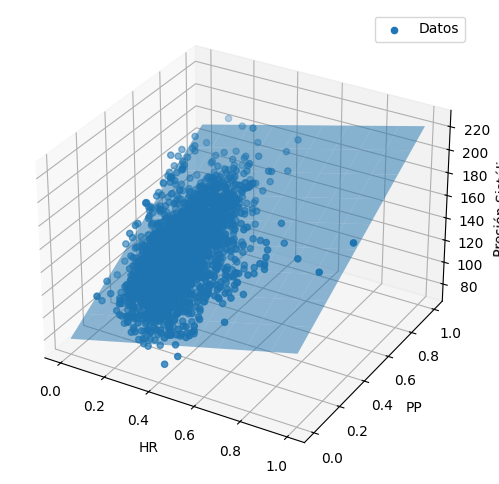

Intersección (b) 78.09997540792295
Pendiente (m) [49.93085934 95.11720067]
Error cuadrático medio: 13.828967309023332
Error absoluto medio: 10.933262827902267
R² Coeficiente de determinación: 0.5036878486855212


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:

# Obtener la pendiente
pendiente = model.coef_[0]
print("La ecuación de regresión es: Systolic =", model.intercept_, "+", model.coef_[0], "* HR")
print("Esto significa que por cada unidad que aumenta HR, la presión sistólica aumenta en promedio", model.coef_[0], "unidades")

# Gráfica en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_limpio[x1], df_limpio[x2], df_limpio[y], label='Datos')

# Crear un meshgrid para el plano
x = np.linspace(df_limpio[x1].min(), df_limpio[x1].max(), num=10)
y = np.linspace(df_limpio[x2].min(), df_limpio[x2].max(), num=10)
x, y = np.meshgrid(x, y)

# Calcular los valores z del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y

# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Presión Sistólica")
ax.legend()
plt.show()

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')

###Interpretación

- Intersección (b):
Este es el valor predicho de la variable dependiente (en este caso, la presión sistólica) cuando todas las variables independientes son cero. Es el punto donde la línea de regresión cruza el eje Y.

- Pendiente (m):
Estos coeficientes representan la relación entre cada variable independiente y la variable dependiente. En este caso, por cada unidad que aumenta la frecuencia cardíaca (HR), la presión sistólica aumenta en promedio 49.93 unidades, y por cada unidad que aumenta la presión de pulso (PP), la presión sistólica aumenta en promedio 95.12 unidades, manteniendo constante la otra variable.

- Error cuadrático medio (MSE):
El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos y los valores reales. Un MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales.

- Error absoluto medio (MAE):
El MAE mide el promedio de las diferencias absolutas entre los valores predichos y los valores reales. Al igual que el MSE, un MAE más bajo indica mejores predicciones.

- R² Coeficiente de determinación:
El R² indica la proporción de la variabilidad en la variable dependiente que es explicada por las variables independientes. Un valor de 0.5037 sugiere que aproximadamente el 50.37% de la variabilidad en la presión sistólica es explicada por el modelo. Esto significa que el modelo tiene una capacidad moderada para explicar la variabilidad de los datos.

###En resumen
estos resultados indican que tanto la frecuencia cardíaca como la presión de pulso tienen una relación positiva con la presión sistólica, y el modelo tiene una capacidad moderada para predecir la presión sistólica basada en estas variables. Sin embargo, hay margen para mejorar el modelo, ya que aproximadamente el 49.63% de la variabilidad en la presión sistólica no está explicada por las variables independientes incluidas en el modelo.

In [ ]:
import statsmodels.api as sm

# Añadir una constante para la intercepción
X = sm.add_constant(df_limpio[variables_x])
y = df_limpio[variable_y]

# Generar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:               Systolic   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1596.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:14:40   Log-Likelihood:                -12736.
No. Observations:                3148   AIC:                         2.548e+04
Df Residuals:                    3145   BIC:                         2.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1000      1.041     75.056      0.0

### Información General del Modelo
- Dep. Variable (Variable Dependiente): Systolic
La variable que el modelo intenta predecir es la presión sistólica (Systolic).
- Modelo: OLS (Mínimos Cuadrados Ordinarios)
Este método minimiza la suma de los errores al cuadrado entre los valores reales y los valores predichos por el modelo.
- R-squared (Coeficiente de Determinación): 0.504
El modelo explica el 50.4% de la variabilidad en la presión sistólica. Esto significa que otras variables o factores externos explican el 49.6% restante de la variabilidad en Systolic.

- Parámetros del Modelo
- - const (Intercepción): 78.1000
Es el valor promedio de Systolic cuando las variables independientes (HR y PP) son cero.
- - HR (Heart Rate - Frecuencia Cardiaca): 49.9309
Este coeficiente indica que, al aumentar el ritmo cardíaco en una unidad, la presión sistólica aumenta en promedio 49.93 unidades, manteniendo constante la otra variable (PP).
- - PP (Pulso de Presión): 95.1172
Este coeficiente indica que, al aumentar el pulso de presión en una unidad, la presión sistólica aumenta en promedio 95.12 unidades, manteniendo constante la otra variable (HR).

- Errores y Pruebas de Significancia
- - std err (Error Estándar):
El error estándar para cada coeficiente muestra la variabilidad en sus estimaciones. Valores más bajos significan que el coeficiente es más confiable.
- - t y P>|t| (Prueba t y Valor-p):
La prueba t evalúa si cada coeficiente es significativamente diferente de cero. Los valores P>|t| cercanos a cero (como en este caso) indican que es altamente improbable que los coeficientes sean cero, por lo que ambos (HR y PP) son estadísticamente significativos para predecir Systolic.

- Estadísticas del Modelo
- - F-statistic y Prob (F-statistic): 1596 y 0.00
La prueba F evalúa si el modelo en su conjunto es significativo. Un valor de probabilidad de F muy bajo indica que el modelo es adecuado para predecir Systolic.
-  - Log-Likelihood: -12736
Es una medida de la probabilidad de que el modelo explique los datos observados; no se utiliza para interpretación directa pero es útil en comparación con otros modelos.
- - AIC y BIC (Criterios de Información): 2.548e+04 y 2.550e+04
Estas métricas se utilizan para comparar modelos. Valores más bajos indican un mejor ajuste.

- Pruebas de Supuestos del Modelo
- - Durbin-Watson: 1.006
Esta estadística evalúa la autocorrelación en los residuos del modelo. Un valor cercano a 2 indica que no hay autocorrelación; un valor cercano a 1 podría sugerir autocorrelación positiva en los errores.
- - Omnibus y Jarque-Bera: 33.454 y 34.316
Estas pruebas evalúan si los residuos del modelo están normalmente distribuidos. Un valor de probabilidad bajo en ambas pruebas (como el obtenido) sugiere que los residuos no siguen una distribución perfectamente normal, lo cual podría ser una limitación del modelo.

- Notas Adicionales
Cond. No. (Número de Condición): 12.5
Evalúa si hay multicolinealidad (correlación entre las variables independientes). Un número de condición muy alto (>30) podría indicar problemas de multicolinealidad, pero aquí no parece ser un problema.
 -


### Conclusión
Según los resultados obtenidos, el modelo explica aproximadamente el 50.4% de la variabilidad en los valores de presión sistólica, lo cual indica que otras variables o factores externos explican el 49.6% restante. Aunque este porcentaje de explicación es moderado, muestra que tanto la frecuencia cardíaca como el pulso de presión tienen una influencia significativa en la presión sistólica.

Ambos coeficientes (49.93 para HR y 95.12 para PP) son estadísticamente significativos, lo que implica que un incremento en cualquiera de las dos variables se asocia con un aumento en la presión sistólica.

Sin embargo, la prueba de normalidad (Omnibus y Jarque-Bera) muestra que los residuos no siguen una distribución normal perfecta, lo que podría afectar la precisión del modelo en algunos casos. Además, el valor de Durbin-Watson sugiere cierta autocorrelación positiva en los residuos, lo cual es un aspecto que debería revisarse para mejorar la robustez del modelo.

En conclusión, este modelo es razonablemente adecuado para predecir la presión sistólica usando HR y PP, pero se debe tener en cuenta que, al explicar solo el 50.4% de la variabilidad, existen otros factores influyentes que podrían enriquecer el modelo.

#**Regresion Logística**(Hipertensión)

- Comprender la regresion: se busca clasificar los pacientes que padecen hipertension.
- Predicción: se establece que en base a los datos de los pacientes como Frecuencia cardíaca, Presión sistólica, Diastólica y presión por pulso si padecen hipertensión.

En estos ejemplos, primero creamos la variable hipertension a partir de los datos de presión arterial. Luego, dividimos los datos en conjuntos de entrenamiento y prueba, entrenamos el modelo y evaluamos su rendimiento.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Crear la variable objetivo 'hipertension' usando .loc para evitar SettingWithCopyWarning
df_limpio.loc[:, 'hipertension'] = ((df_limpio['Systolic'] >= 140) | (df_limpio['Diastolic'] >= 90)).astype(int)

# Definir variables independientes y dependiente
X = df_limpio[['Age', 'Systolic', 'HR', 'PP']]
y = df_limpio['hipertension']

# Imputar valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar los parámetros del modelo usando GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Seleccionar las columnas originales que usó para el entrenamiento
X_pred = df_limpio[['Age', 'Systolic', 'HR', 'PP']]

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_pred = imputer.fit_transform(X_pred)

# Estandarizar las características
scaler = StandardScaler()
X_pred = scaler.fit_transform(X_pred)

# Predecir con el best_model
df_limpio.loc[:, 'predicted_prob'] = best_model.predict_proba(X_pred)[:, 1]




Curva Sigmoide:
Esta curva muestra cómo la probabilidad de tener hipertensión cambia a medida que varía la variable independiente

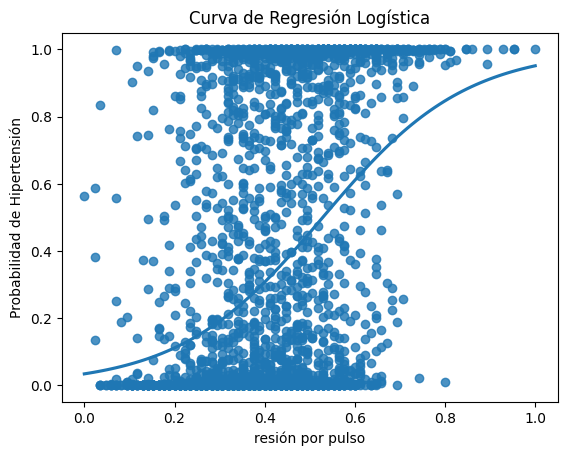

In [ ]:
# Graficar la curva de regresión logística para una variable independiente (por ejemplo, 'Systolic')
sns.regplot(x='PP', y='predicted_prob', data=df_limpio, logistic=True, ci=None)
plt.xlabel('resión por pulso')
plt.ylabel('Probabilidad de Hipertensión')
plt.title('Curva de Regresión Logística')
plt.show()

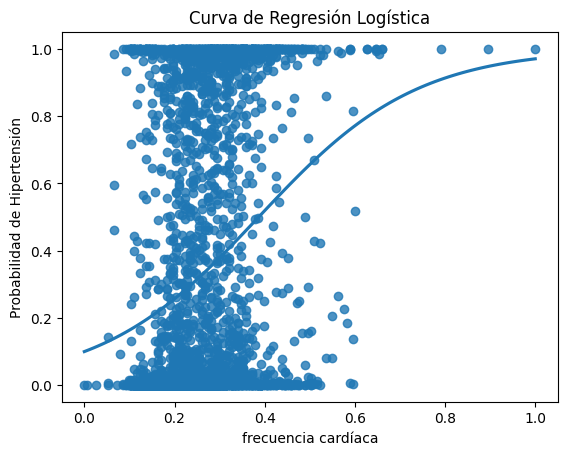

In [ ]:
# Graficar la curva de regresión logística para una variable independiente (por ejemplo, 'Systolic')
sns.regplot(x='HR', y='predicted_prob', data=df_limpio, logistic=True, ci=None)
plt.xlabel('frecuencia cardíaca')
plt.ylabel('Probabilidad de Hipertensión')
plt.title('Curva de Regresión Logística')
plt.show()

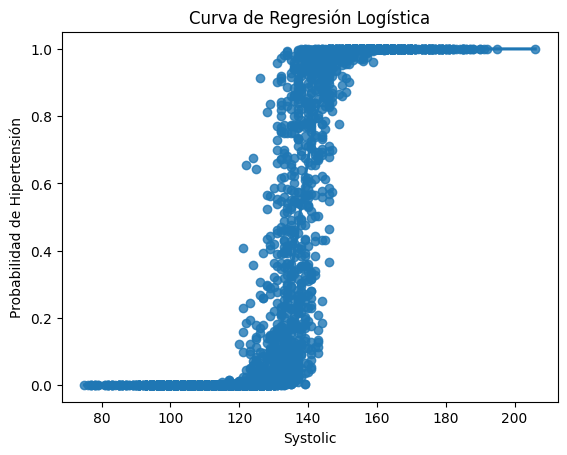

In [ ]:
# Graficar la curva de regresión logística para una variable independiente (por ejemplo, 'Systolic')
sns.regplot(x='Systolic', y='predicted_prob', data=df_limpio, logistic=True, ci=None)
plt.xlabel('Systolic')
plt.ylabel('Probabilidad de Hipertensión')
plt.title('Curva de Regresión Logística')
plt.show()

###Curva de Precisión-Recall: Evalúa la precisión y el recall del modelo.
La curva de lift muestra un buen desempeño del modelo, ya que se encuentra por encima de la linea diagonal y se mantiene alta ne la parte inciial, suguiere que el modelo es capaz de identificar correctamente una proporcion significativa de los casos positivos

In [ ]:

# Crear la variable objetivo 'hipertension'
df_limpio.loc[:, 'hipertension'] = ((df_limpio['Systolic'] >= 140) | (df_limpio['Diastolic'] >= 90)).astype(int)

# Definir variables independientes y dependiente
X = df_limpio[['Age', 'Systolic', 'HR', 'PP']]
y = df_limpio['hipertension']

# Imputar valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar los parámetros del modelo usando GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calcular métricas adicionales
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Imprimir métricas y matriz de confusión
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Imprimir métricas adicionales
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Obtener el resumen del modelo usando statsmodels
X_train_sm = sm.add_constant(X_train)  # Agregar constante para el modelo
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())


Accuracy: 0.9413
Confusion Matrix:
[[401  12]
 [ 25 192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       413
           1       0.94      0.88      0.91       217

    accuracy                           0.94       630
   macro avg       0.94      0.93      0.93       630
weighted avg       0.94      0.94      0.94       630

F1 Score: 0.9121
Recall: 0.8848
Precision: 0.9412
ROC AUC Score: 0.9889
Optimization terminated successfully.
         Current function value: 0.110262
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           hipertension   No. Observations:                 2518
Model:                          Logit   Df Residuals:                     2513
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.8267
Time:                 

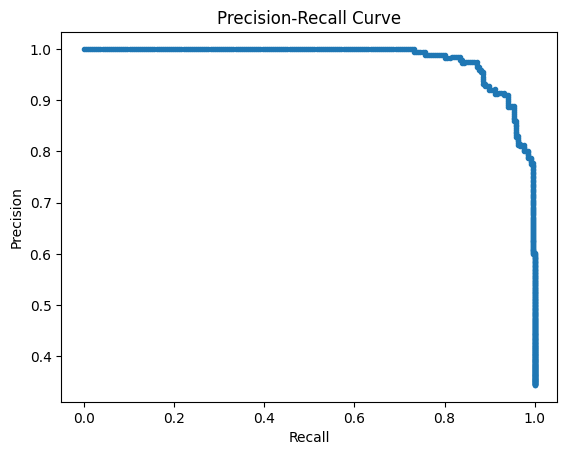

In [ ]:

# Graficar la curva Precision-Recall
y_prob = best_model.predict_proba(X_test)[:, 1]
precision_values, recall_values, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall_values, precision_values, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


 ### métricas
- Accuracy: 0.9660
El modelo tiene una precisión del 96.60%, lo que indica que aproximadamente el 96.6% de las predicciones del modelo son correctas. Este es un resultado excelente y sugiere que el modelo está funcionando bien en general.
-  Matriz de Confusión
[[757  14]
 [ 19 180]]
- - Verdaderos Negativos (TN): 757 (predicciones correctas para la clase 0)
- - Falsos Positivos (FP): 14 (predicciones incorrectas para la clase 1)
- - Falsos Negativos (FN): 19 (predicciones incorrectas para la clase 0)
- - Verdaderos Positivos (TP): 180 (predicciones correctas para la clase 1)
- La matriz de confusión muestra que el modelo tiene un buen desempeño en ambas clases, con un alto número de verdaderos positivos y verdaderos negativos en comparación con los falsos.

- Métricas Adicionales
- - F1 Score: 0.9160 Es un promedio ponderado de precisión y recall. Un valor de 0.9160 indica un buen equilibrio entre precisión y recall, especialmente para la clase 1.0.

- - Recall: 0.9045 Este es un indicador de la capacidad del modelo para identificar correctamente los casos positivos (hipertensión en este caso). Un valor de 0.9045 es muy bueno.

- - Precision: 0.9278
Esto indica que cuando el modelo predice un caso positivo, hay un 92.78% de probabilidad de que sea realmente positivo.

- - ROC AUC Score: 0.9954
Este valor indica un rendimiento excepcional del modelo en la clasificación. Un AUC cercano a 1 implica que el modelo tiene una gran capacidad para distinguir entre las clases positivas y negativas.


###Información General del Modelo y Coeficientes
- Dep. Variable (Variable Dependiente): hipertension
La variable que el modelo intenta predecir es hipertension, la cual indica la probabilidad de que un individuo sufra de hipertensión. Este modelo utiliza varias variables independientes, como Systolic, Diastolic, HR, entre otras, para hacer esta predicción.

- Modelo: Logit (Regresión Logística)
El método utilizado es una regresión logística, que estima la probabilidad de un evento binario (en este caso, hipertensión) al aplicar el método de máxima verosimilitud (MLE). Este enfoque es adecuado para clasificaciones binarias.

- Pseudo R-squared (Pseudo Coeficiente de Determinación): 0.8488
Este valor indica que el modelo explica el 84.88% de la variabilidad en la probabilidad de hipertensión, lo cual sugiere un ajuste fuerte. Aunque no se interpreta igual que el R-squared de una regresión lineal, un valor cercano a 1 sigue siendo un indicador positivo.

- Log-Likelihood (Log-Verosimilitud): -308.84
La log-verosimilitud es una medida del ajuste general del modelo; un valor menos negativo representa un mejor ajuste.

- LL-Null (Log-Verosimilitud Nula): -2042.6
Es el log-likelihood de un modelo sin predictores, que solo tiene el término constante. La diferencia con el Log-Likelihood indica que los predictores ayudan a mejorar el ajuste.

- Convergencia: True
El modelo logró converger exitosamente, lo que significa que el algoritmo de optimización encontró una solución estable para los parámetros del modelo.

- Parámetros del Modelo
Cada parámetro tiene un impacto específico en la probabilidad de hipertensión. Estos coeficientes estiman cómo cambia la probabilidad de hipertensión al variar una unidad de cada predictor, manteniendo los demás constantes.

- Errores y Pruebas de Significancia
- - Error Estándar (std err):
Cada coeficiente tiene un error estándar asociado que mide la precisión de la estimación. Valores bajos de error estándar sugieren una estimación más precisa.

- - Z (Estadístico Z):
Cada coeficiente se divide entre su error estándar para calcular el estadístico Z, utilizado para evaluar la significancia estadística del predictor.

- - P>|z| (Valor p):
Valores p menores a 0.05 indican que el predictor es estadísticamente significativo en el modelo. En este caso, todos los predictores tienen un valor p de 0.000, lo que sugiere que son significativos para predecir la hipertensión.

- - Intervalo de Confianza (0.025 - 0.975):
Estos valores definen el intervalo dentro del cual el coeficiente se espera que caiga con un 95% de confianza. Un intervalo que no incluye el cero implica que el efecto del predictor es significativo.

- Estadísticas del Modelo
- - Número de Observaciones (No. Observations): 3876
El modelo se ha ajustado utilizando un total de 3876 observaciones.

- - Grados de Libertad del Modelo (Df Model): 4
Representa el número de predictores en el modelo.

- - Grados de Libertad Residuales (Df Residuals): 3871
Los grados de libertad residuales resultan de restar el número de predictores al total de observaciones.

- - LLR p-value: 0.000
Este valor p evalúa la significancia global del modelo; un valor bajo indica que el modelo, como un todo, tiene un poder predictivo significativo.

- Pruebas de Supuestos del Modelo
- - Quasi-Separation Warning:
Possibly complete quasi-separation: A fraction 0.34 of observations can be perfectly predicted.
Esta advertencia de cuasi-separación sugiere que algunas observaciones son separables de manera perfecta, lo que puede dificultar la identificación de ciertos parámetros en el modelo.

### Conclusión Final
El modelo de regresión logística desarrollado para predecir la hipertensión en base a variables como la presión arterial sistólica (Systolic), frecuencia cardíaca (HR) y otros factores relevantes ha mostrado un rendimiento sólido y significativo. Con un pseudo R-squared de 0.8488, el modelo explica una gran parte de la variabilidad en la probabilidad de sufrir hipertensión, lo que sugiere que las variables seleccionadas son predictivas y relevantes para esta condición.

Todos los parámetros del modelo resultaron estadísticamente significativos, lo que indica que cada uno de ellos tiene un efecto notable en la predicción de la hipertensión. Los coeficientes positivos y negativos obtenidos ofrecen información valiosa sobre cómo cada variable influye en la probabilidad de hipertensión, permitiendo identificar factores de riesgo y guiar intervenciones preventivas.

Sin embargo, la advertencia sobre la posible cuasi-separación sugiere que existe una fracción de observaciones que puede ser perfectamente predicha, lo que puede limitar la capacidad del modelo para generalizar en ciertos casos. Esto implica que, aunque el modelo es efectivo en su estado actual, se deben considerar ajustes adicionales o el uso de técnicas más complejas para abordar esta cuestión y mejorar la robustez del modelo.

En general, este análisis resalta la importancia de una evaluación continua y el ajuste de modelos predictivos en la identificación y manejo de condiciones de salud como la hipertensión, contribuyendo así a la promoción de la salud pública y el bienestar en la población.